In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, ensemble
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [2]:
iris=pd.read_csv("./iris-data.csv")
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris['class'].unique()
# según vemos en la información online solo hay 3 clases: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
#por lo que están mal los nombres de 2 clases.

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [4]:
iris['class'] = iris['class'].replace({'Iris-setossa':'Iris-setosa', 'versicolor': 'Iris-versicolor'})

In [5]:
#Encoding
class1 = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['Coding class'] = iris['class'].map(class1)
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,Coding class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,2.3,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
 5   Coding class     150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Coding class
count,150.000000,150.000000,150.000000,145.000000,150.000000
mean,5.644627,3.054667,3.758667,1.236552,1.000000
std,1.312781,0.433123,1.764420,0.755058,0.819232
min,0.055000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.400000,0.000000
50%,5.700000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
#vemos nulos
iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
Coding class       0
dtype: int64

In [11]:
#corroboramos que no hay nulos, no hya missing DATA. 
def missing_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    return missing_values_df

In [12]:
missing_percentage(iris) # solo hay un 3,33% de valores nulos, muy pocos. 

,column_name,percent_missing
sepal_length_cm,sepal_length_cm,0.000000
sepal_width_cm,sepal_width_cm,0.000000
petal_length_cm,petal_length_cm,0.000000
petal_width_cm,petal_width_cm,3.333333
class,class,0.000000
Coding class,Coding class,0.000000


In [16]:
iris_NA = iris.dropna()
iris_NA
#decido quitar las 5 filas con nulos al representar unicamente el 3,33% de todo el dataset. 

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,Coding class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,2.3,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [17]:
iris_1 = iris_NA.drop('class', axis=1)
iris_1
#quitamos la columna que no está codificada para poder trabajar sobre el dataset.

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Coding class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,2.3,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(iris_1)
scaled_data

array([[6.43084767e-01, 6.25000000e-01, 6.77966102e-02, 4.16666667e-02,
        0.00000000e+00],
       [6.17590822e-01, 4.16666667e-01, 6.77966102e-02, 4.16666667e-02,
        0.00000000e+00],
       [5.92096877e-01, 5.00000000e-01, 5.08474576e-02, 4.16666667e-02,
        0.00000000e+00],
       [5.79349904e-01, 4.58333333e-01, 8.47457627e-02, 4.16666667e-02,
        0.00000000e+00],
       [6.30337795e-01, 6.66666667e-01, 6.77966102e-02, 4.16666667e-02,
        0.00000000e+00],
       [6.81325685e-01, 7.91666667e-01, 1.18644068e-01, 1.25000000e-01,
        0.00000000e+00],
       [5.79349904e-01, 5.83333333e-01, 6.77966102e-02, 8.33333333e-02,
        0.00000000e+00],
       [6.04843850e-01, 4.16666667e-01, 6.77966102e-02, 0.00000000e+00,
        0.00000000e+00],
       [7.19566603e-01, 4.16666667e-01, 1.69491525e-02, 0.00000000e+00,
        0.00000000e+00],
       [7.32313576e-01, 8.33333333e-01, 3.38983051e-02, 4.16666667e-02,
        0.00000000e+00],
       [7.19566603e-01, 1.0000

In [19]:
scaled_df = pd.DataFrame(scaled_data)
scaled_df.describe()

,0,1,2,3,4
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,0.715781,0.435920,0.480771,0.473563,0.517241
std,0.169094,0.181290,0.295416,0.314608,0.405748
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.643085,0.333333,0.101695,0.125000,0.000000
50%,0.732314,0.416667,0.576271,0.500000,0.500000
75%,0.808795,0.541667,0.694915,0.708333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


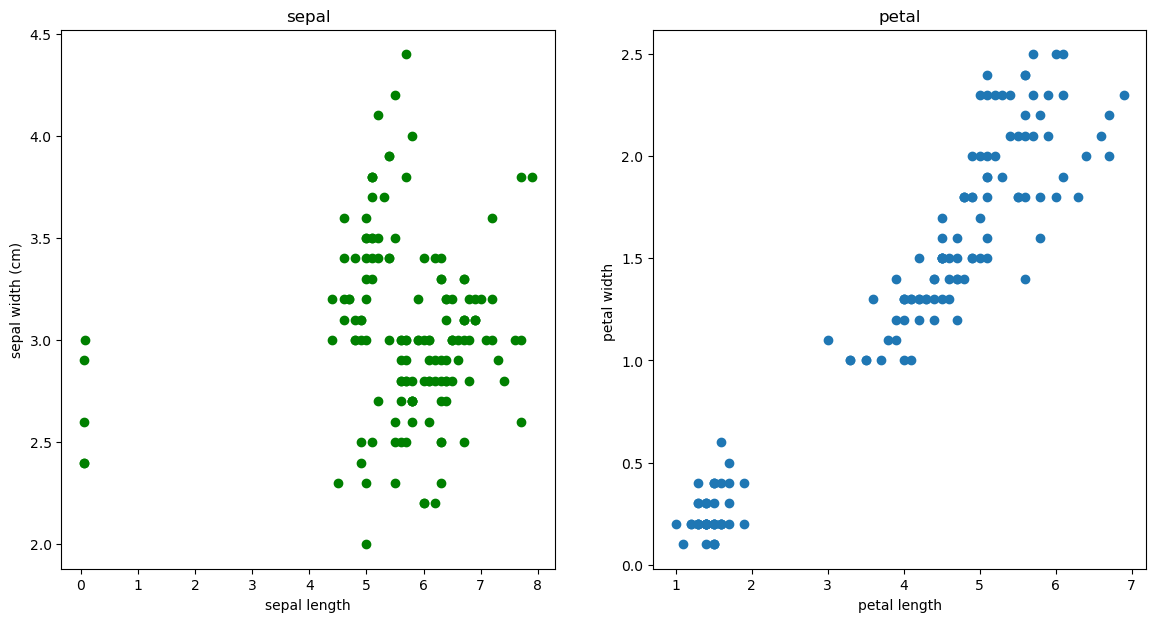

In [22]:
#Estudio de las variblaes que están mas interrelacionadas. 
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,7))
axs[0].scatter(iris_1['sepal_length_cm'], iris_1['sepal_width_cm'], c='green')
axs[0].set(xlabel='sepal length', ylabel='sepal width (cm)', title='sepal')
axs[1].scatter(iris_1['petal_length_cm'], iris_1['petal_width_cm'])
axs[1].set(xlabel='petal length', ylabel='petal width ', title='petal');

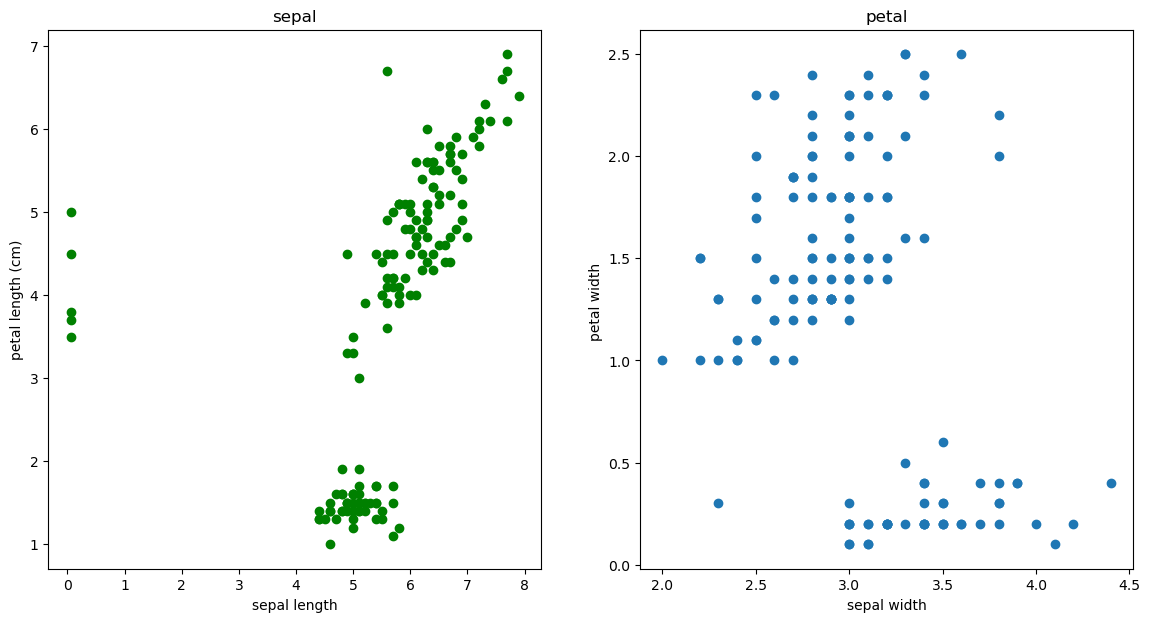

In [24]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,7))
axs[0].scatter(iris['sepal_length_cm'], iris['petal_length_cm'], c='green')
axs[0].set(xlabel='sepal length', ylabel='petal length (cm)', title='sepal')
axs[1].scatter(iris['sepal_width_cm'], iris['petal_width_cm'])
axs[1].set(xlabel='sepal width', ylabel='petal width ', title='petal');

In [26]:
#pearson
print(iris_1['petal_length_cm'].corr(iris_1['petal_width_cm'], method='pearson'))
print(iris_1['sepal_length_cm'].corr(iris_1['petal_length_cm'], method='pearson'))

0.9589339013907309
0.480735671465361


In [29]:
# Spearman
print(iris_1['petal_length_cm'].corr(iris_1['petal_width_cm'], method='spearman'))
print(iris_1['sepal_length_cm'].corr(iris_1['petal_length_cm'], method='spearman'))

0.9359755063957527
0.8162625542094014


In [30]:
iris_correlation = iris_1.corr()
iris_correlation

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,Coding class
sepal_length_cm,1.000000,0.073926,0.480736,0.469734,0.462854
sepal_width_cm,0.073926,1.000000,-0.411939,-0.348464,-0.411677
petal_length_cm,0.480736,-0.411939,1.000000,0.958934,0.946206
petal_width_cm,0.469734,-0.348464,0.958934,1.000000,0.954491
Coding class,0.462854,-0.411677,0.946206,0.954491,1.000000


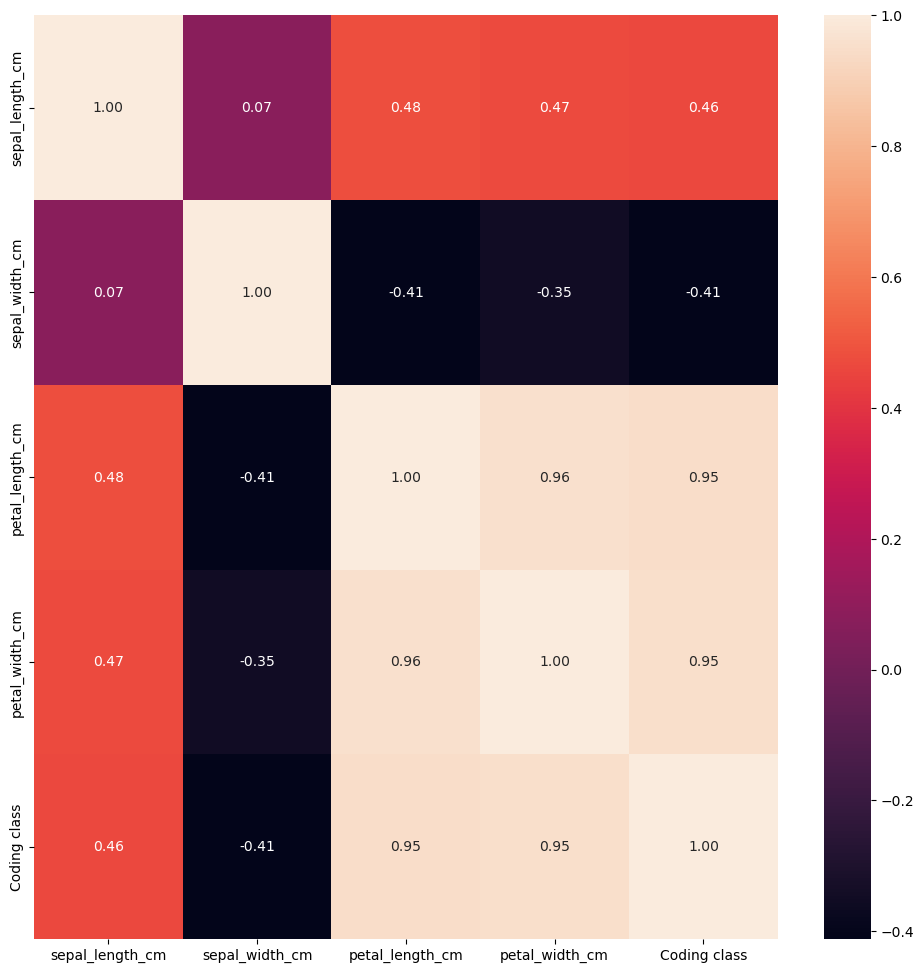

In [31]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(iris_1.corr(method='pearson'), annot=True, fmt='.2f', ax=ax);